In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 1.0       # Distance between lines
l = 1.0       # Needle length (l <= d)
N = 10000     # Number of needle drops

# For reproducibility
np.random.seed(42)


In [ ]:
# Arrays to store results
pi_estimates = []
crossings = 0

for i in range(1, N+1):
    # Randomly generate x (distance from center to nearest line)
    x = np.random.uniform(0, d/2)
    # Randomly generate theta (angle with horizontal)
    theta = np.random.uniform(0, np.pi/2)
    # Check if needle crosses a line
    if (l/2) * np.sin(theta) >= x:
        crossings += 1
    # Avoid division by zero
    if crossings > 0:
        pi_est = (2 * i * d) / (crossings * l)
        pi_estimates.append(pi_est)
    else:
        pi_estimates.append(0)


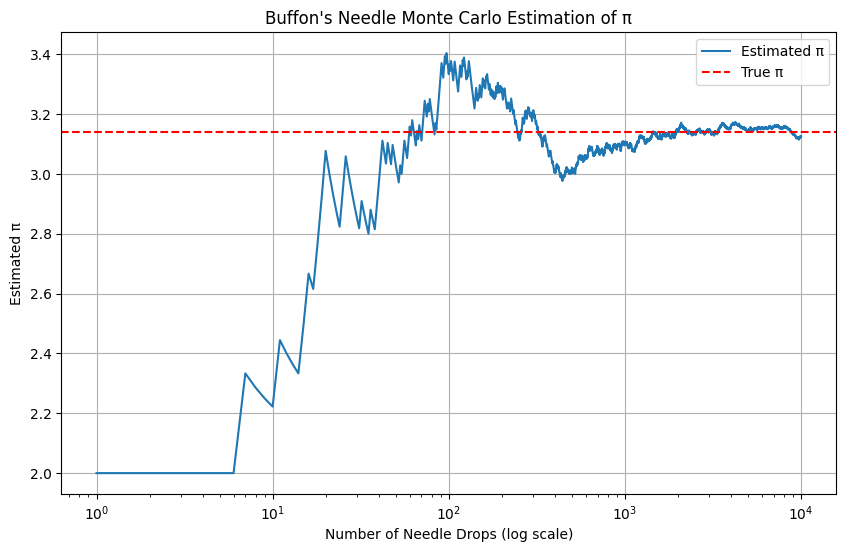

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, N+1), pi_estimates, label='Estimated π')
plt.axhline(y=np.pi, color='r', linestyle='--', label='True π')
plt.xscale('log')
plt.xlabel('Number of Needle Drops (log scale)')
plt.ylabel('Estimated π')
plt.title("Buffon's Needle Monte Carlo Estimation of π")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(f"Final estimate of π after {N} drops: {pi_estimates[-1]}")
print(f"True value of π: {np.pi}")
print(f"Absolute error: {abs(pi_estimates[-1] - np.pi)}")


Final estimate of π after 10000 drops: 3.124511795032026
True value of π: 3.141592653589793
Absolute error: 0.017080858557767087


In [81]:

# Q2, Part-B, (c)

from scipy.stats import norm
from scipy.integrate import quad

# Parameters
S0 = 100     # Initial stock price
K = 105      # Strike price
T = 10       # Time in days
sigma_daily = np.sqrt(np.pi / 2)  # From E[|X|] = sigma * sqrt(2/pi) = 1
sigma_T = np.sqrt(T) * sigma_daily  # 10-day standard deviation

# Define the integrand: (S - K) * f(S)
def integrand(S):
    pdf = norm.pdf(S, loc=S0, scale=sigma_T)
    return (S - K) * pdf

# Numerical integration from K to infinity
expected_payoff, error = quad(integrand, K, S0 + 6 * sigma_T)  # upper limit ~ 6σ for practicality




In [82]:
from scipy.stats import norm
from scipy.integrate import quad
import numpy as np

mu = 100
sigma = np.sqrt(10 * (np.pi/2))

f = lambda S: (S - 105) * norm.pdf(S, mu, sigma)
value, _ = quad(f, 105, np.inf)


# Code for (c),Part-C